# Latent Probability Model

Spacy: Used for NLP and has the machine learning module
    
SpacyTextBlob: Used for the sentiment analysis
    
Pandas: Stores the data as a dataframe table
    
NewsPaper: Used for web scraping
    
Requests: Makes the connection to the URL

In [2]:
from newspaper import Article
from random import shuffle
import re
import matplotlib.pyplot as plt 
from collections import Counter

import numpy as np
import json
import glob

#gensim
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary  # Import the Dictionary class from Gensim

#spacy
import spacy
from nltk.corpus import stopwords
from wordcloud import WordCloud

#vis
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

c:\Users\biehl\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pandas as pd
import requests
from newspaper import Article
import numpy as np

In [27]:
%run SentimentAnalysis.ipynb
%run WebScraper.ipynb
%run PipelineHelpers.ipynb
%run TopicModeling.ipynb
%run DataVisualization.ipynb

IMPORTANT: If you want to try re-runing after making some code changes or want to 
run a new .csv file through the code block below and the one a couple down with the
 rerun note will need to be ran again for the analysis to work correctly

In [5]:
# Loading our two pipelines
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

IMPORTANT: Insert the .csv file you want to be read below.

In [6]:
csvFile = "urls.csv"
wordCountFilter = 250
social_starts_with = ["https://www.youtube.com", "https://youtu.be", "https://www.facebook.com", 
                      "https://twitter.com", "https://gettr.com/"]


In [7]:
# rerun
# Using panda to load in our .csv file
df = pd.read_csv(csvFile) # File we are checking
urls = df["Address"].tolist() # Column name we are checking
all_text_gathered = []
all_articles = ''
scentence_list = []


# Temp Webscrape Checking

In [8]:
scrape_check = []
for url in urls:
    url_data = {}
    url_data["URL"] = url
    if scrapeData(url)[:8] == "PARERROR":
        url_data["Error"] = scrapeData(url)
    else:
        url_data["Error"] = "None"
    url_data["Text"] = raw_scrape_data(url)
    scrape_check.append(url_data)

In [9]:
scrape_check

[{'URL': 'https://www.thegatewaypundit.com/2022/05/world-health-organization-global-pandemic-treaty-includes-plan-mandatory-universal-digital-passport-system/',
  'Error': 'None',
  'Text': 'this week, global elitists and world leaders from across the west are gathered in davos, switzerland for the who’s annual world health assembly.\n\nwhile convened, attendees from all 194 who member countries are set to vote on major amendments to the international health regulations that would effectively strip all power away from sovereign countries and turn it over to the who’s global health board in the event of a pandemic.\n\nif the ratifications are agreed to this week, the who would also be granted sole authority over what constitutes a pandemic. and, as we have seen over the past two years, just about anything qualifies as an ‘existential threat to public health’ including, but not limited to: misinformation, parents protesting at school boards, free speech, and – of course – racism. the fac

# This is the pipeline. All code is called and ran through here.

In [10]:
# Loops through our URLS and scraps the data
# Put all empty dictionaries here
sentimentDic = {}
    
for count, x in enumerate(urls):
    if(count % 10 == 0):
        print(str(count))

    url = x

    # Send the URL to get scraped
    page_text = scrapeData(x)
    # All articles will have a long string of all the text that has been scraped
    all_articles = all_articles + " " +  page_text
    
    # Puts the article into a list of all the sentences in the article
    sentenceList = sentenceLevel(page_text)

    # Runs sentiment analysis. Will need to make a new function and a new dictionary
    # for each type of analysis we want to run. Will pass in the page_text, the dic, and
    # x (the url)
    sentimentDic = sentimentAnalysis(page_text, sentimentDic, url)
        
        
        
#print("The average sentiment score was: " + str(sum(url_sent_score) / len(url_sent_score)))
#print("The average subjectivity score was: " + str(sum(url_subj_score) / len(url_subj_score)))

# For each analysis we run we need to then convert that dictionary with the following method
sentDic = dictionaryToDataFrame(sentimentDic)
sentDic
# Used if we want to convert it to a .csv sentDic.to_csv("sentiment130.csv")


0
10
20
30


,URL,Sentiment Score,Sentiment Label,Subjectivity Score,Positive Words,Negative Words
0,https://www.thegatewaypundit.com/2022/05/world...,0.05,Neutral Positive,0.28,"confident, thanks, free, effectively, absolute...","past, single, needless, other, absolutely"
1,https://gettr.com/post/ptt4ta7c84,0.00,PARERROR: WebBlockerError,0.00,,
2,https://komonews.com/news/coronavirus/if-covid...,0.06,Neutral Positive,0.36,"normal, largely, free, own, legal, social, com...","complaint, failed, unable, active, absolutely,..."
3,https://www.lewrockwell.com/2018/11/no_author/...,0.10,Neutral Positive,0.41,"effectively, most, real, far, sure, clean, pro...","killed, past, base, military, less, badly, act..."
4,https://nation.com.pk/08-Apr-2021/russia-offer...,0.07,Neutral Positive,0.28,"strong, good, important, full, particularly, d...","foreign, military, actively, mainly"
5,https://barrie.ctvnews.ca/cfb-borden-based-mil...,-0.02,Neutral Negative,0.38,"willingly, good, unique, full, fine, not, first","wrong, due, base, sorry, military, other, very..."
6,https://www.reuters.com/world/us/us-army-disch...,0.00,PARERROR: WebBlockerError,0.00,,
7,https://www.dailysabah.com/world/europe/sweden...,0.03,Neutral Negative,0.30,"directly, direct, first, new, kind, light","foreign, long, active, green, military, previo..."
8,https://www.military.com/daily-news/2022/11/01...,0.07,Neutral Positive,0.46,"latest, fly, nearly, most, legal, best, develo...","behind, previous, active, base, military, firm..."
9,https://roundingtheearth.substack.com/p/defini...,0.00,PARERROR: WebBlockerError,0.00,,


## Pre-Processing

In [11]:
rawData = []
for url in open("urls.csv"):
    scrapedData = scrapeData(url)
    if filter_scrape_data(scrapedData):
        rawData.append(scrapedData)

### Lemmatize Data

In [12]:
lemmatizedData = lemmatization(rawData)

### Remove Stop Words

In [13]:
filteredData = [preprocess_article(x) for x in lemmatizedData]

### Tokenize

In [14]:
tokenizedData = gen_words(filteredData)

### Create Dictionary

In [15]:
id2word = corpora.Dictionary(tokenizedData)
id2word.filter_extremes(no_below=0.1, no_above=0.9)

### Create Corpus

In [16]:
corpus = [id2word.doc2bow(text) for text in tokenizedData]

## Topic Modeling

In [17]:
#configuration for running our LDA model, topic_limit =max topics, topic_start = start of # of topics, topic_step = what increment we add to the # of topics
topic_limit = 150; topic_start=5; topic_step=5;

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, tokenizedData=tokenizedData, limit=topic_limit, start=topic_start, step=topic_step)

### Visualization

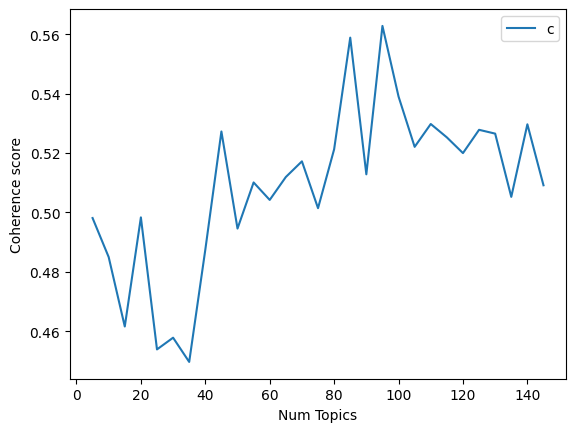

In [18]:
x = range(topic_start, topic_limit, topic_step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [19]:
abs_coherence_values = [abs(x) for x in coherence_values]
best_result_index = abs_coherence_values.index(max(abs_coherence_values))
LDA_model = model_list[best_result_index]
# Select the model and print the topics
model_topics = LDA_model.show_topics(formatted=False)
converted_topics = []
for topic_id, words in sorted(model_topics):
    converted_words = [(word, float(score)) for word, score in words]
    converted_topics.append((int(topic_id), converted_words))
write_data("data/topics.json", converted_topics)
print(f'''The {x[best_result_index]} topics gives the highest coherence score 
of {coherence_values[best_result_index]}''')

The 95 topics gives the highest coherence score 
of 0.5628630131814101


defaultdict(<class 'list'>, {0: [(10, 0.9958249)], 1: [(32, 0.9920841)], 2: [(10, 0.023382459), (16, 0.010236971), (48, 0.926334), (59, 0.016235674), (82, 0.014780668)], 3: [(46, 0.9563159), (59, 0.03996171)], 4: [(10, 0.015827147), (16, 0.02908486), (29, 0.87931466), (59, 0.061888635), (61, 0.01132401)], 5: [(17, 0.99226964)], 6: [(59, 0.9970811)], 7: [(16, 0.9982517)], 8: [(88, 0.9939665)], 9: [(61, 0.99100465)], 10: [(56, 0.99312854)], 11: [(31, 0.9968386)], 12: [(48, 0.014730065), (82, 0.9779693)]})
[(10, 0.9958249)]


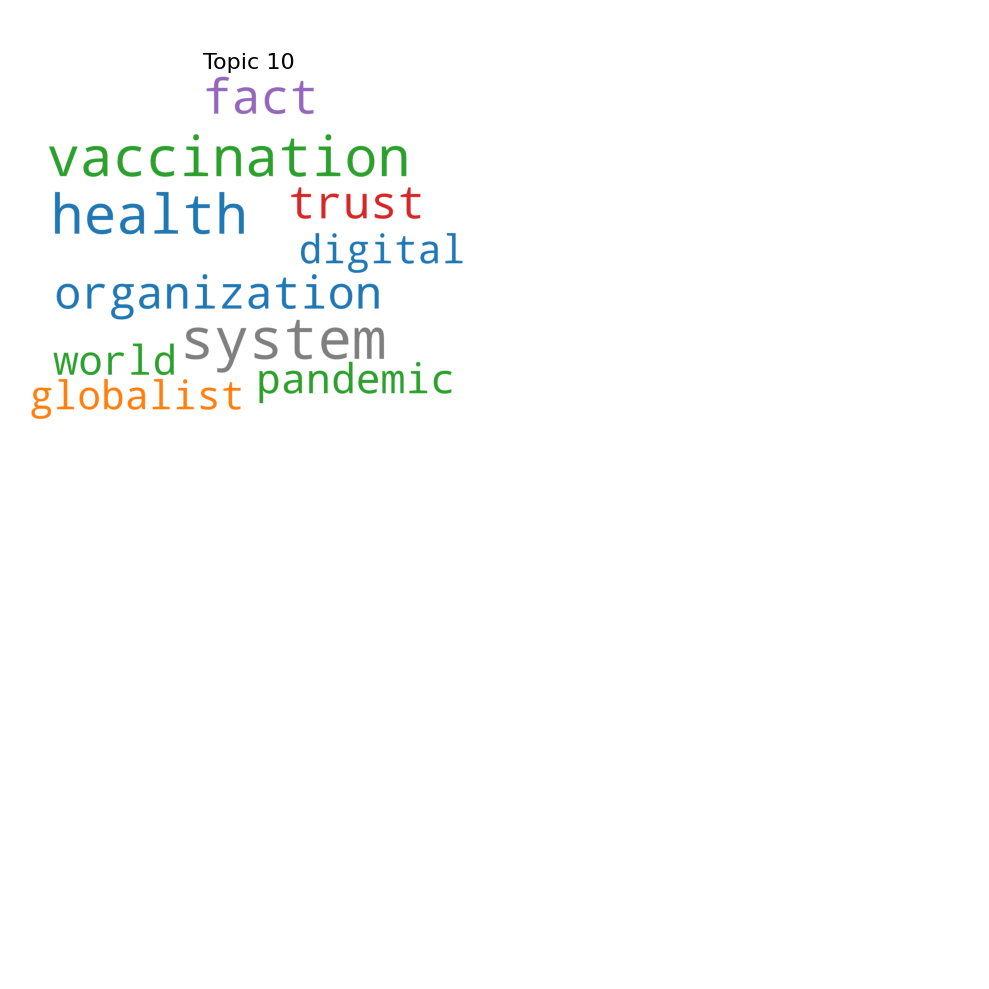

[(32, 0.9920841)]


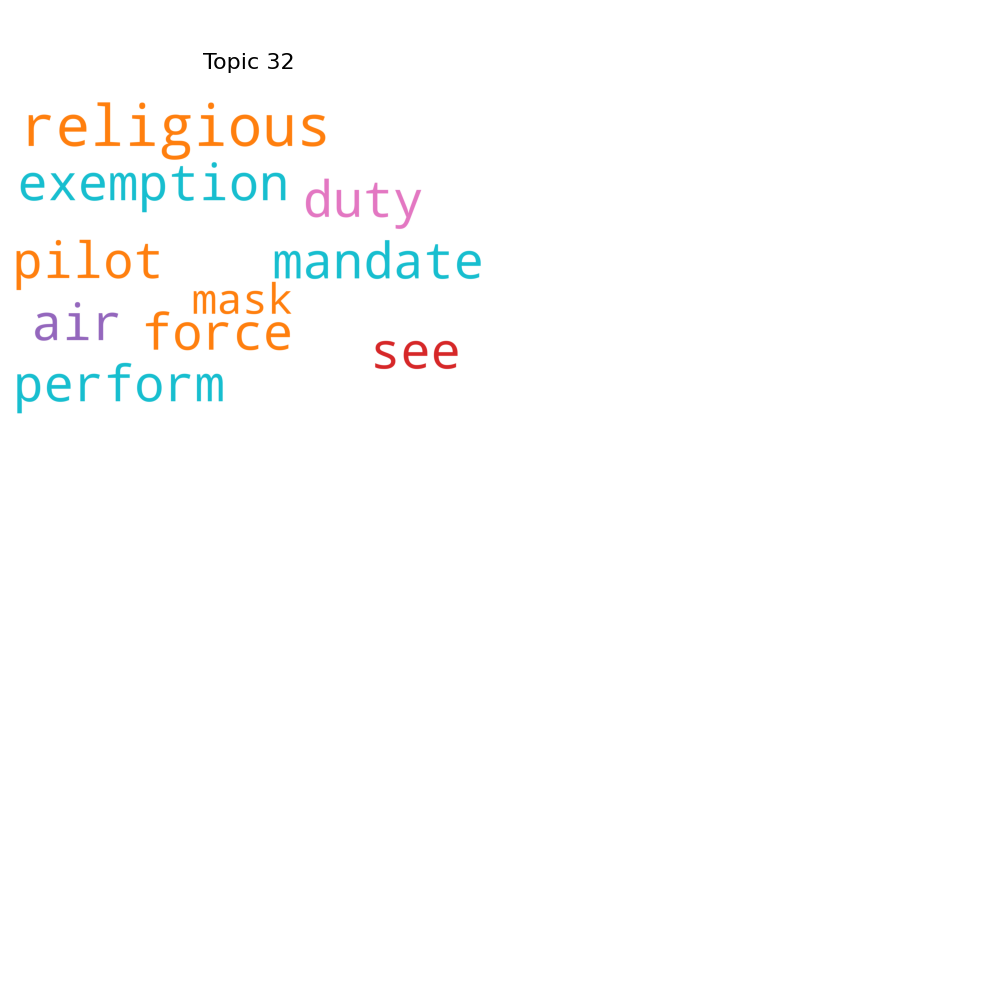

[(10, 0.023382459), (16, 0.010236971), (48, 0.926334), (59, 0.016235674), (82, 0.014780668)]


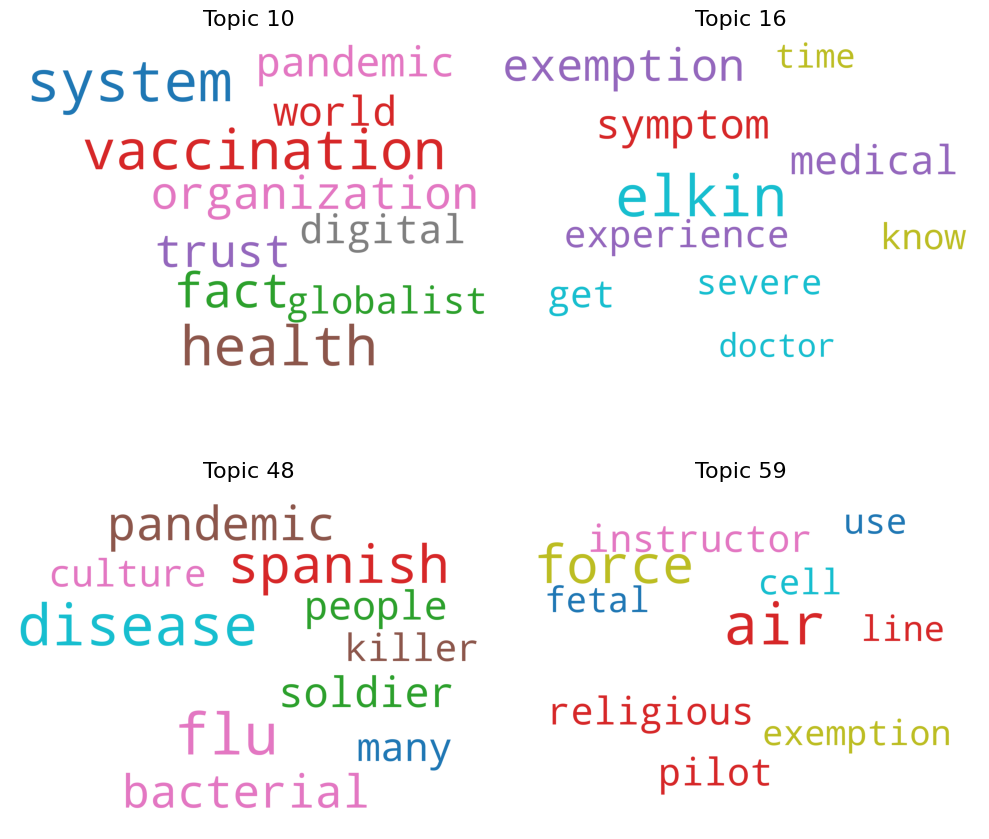

[(46, 0.9563159), (59, 0.03996171)]


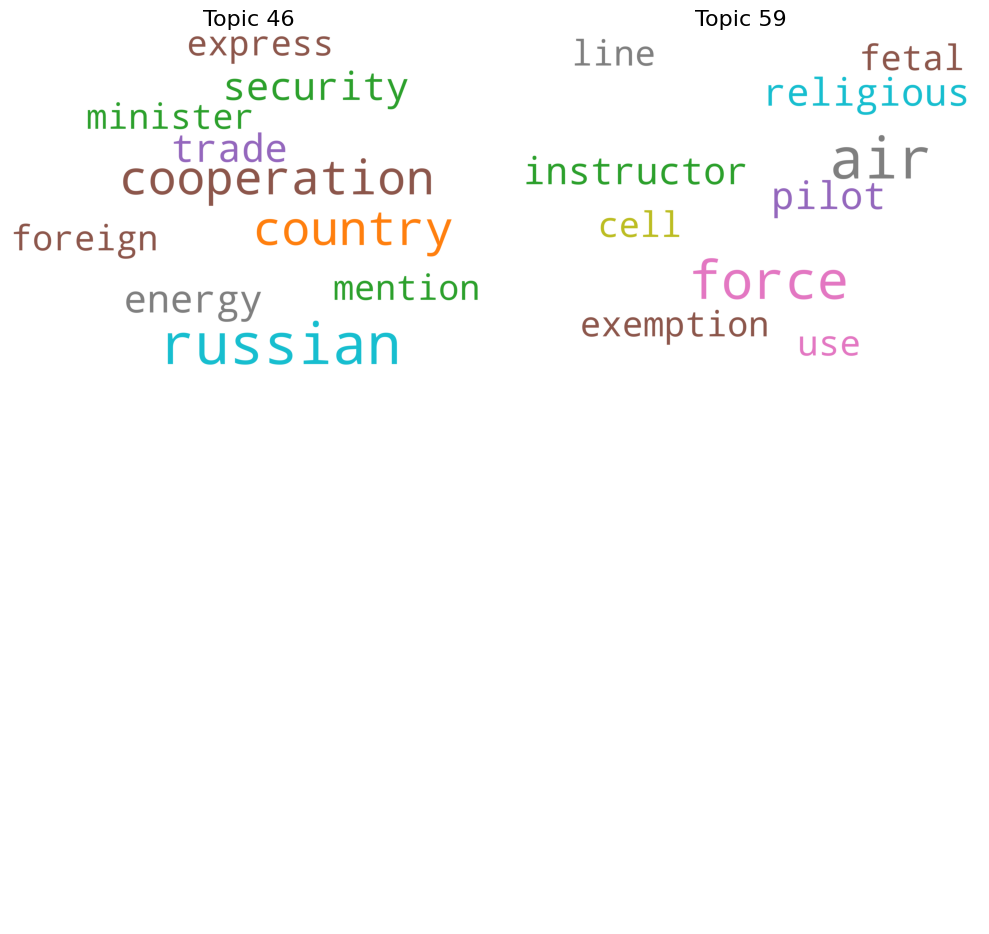

[(10, 0.015827147), (16, 0.02908486), (29, 0.87931466), (59, 0.061888635), (61, 0.01132401)]


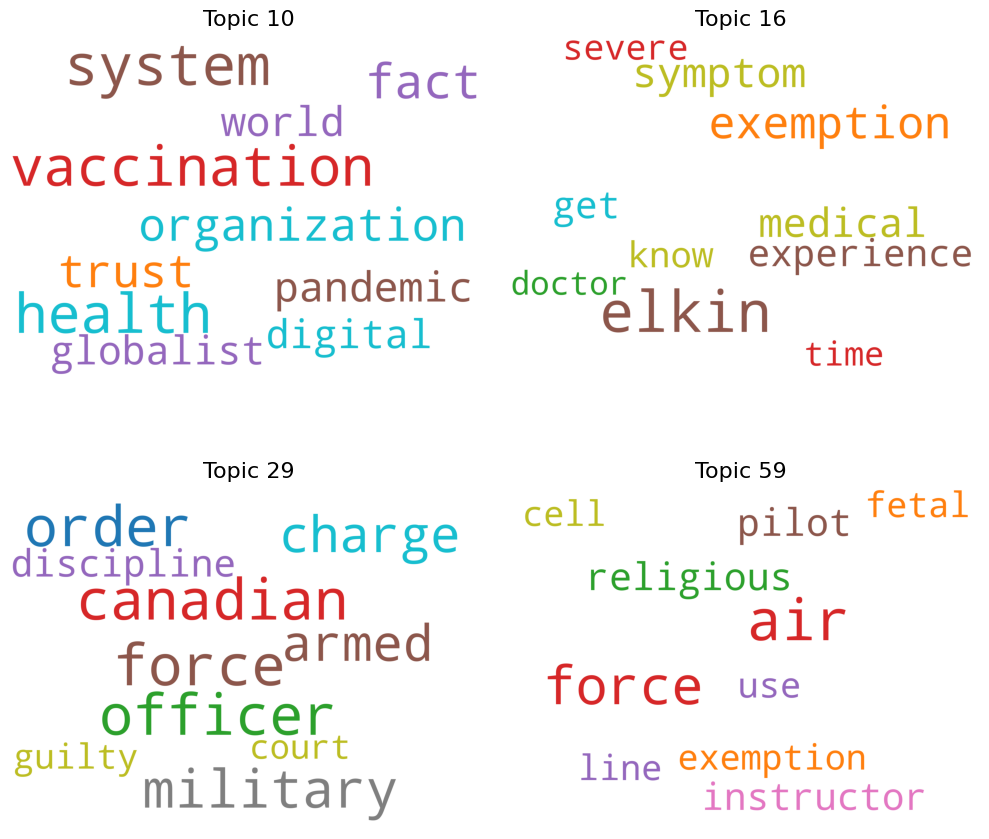

[(17, 0.99226964)]


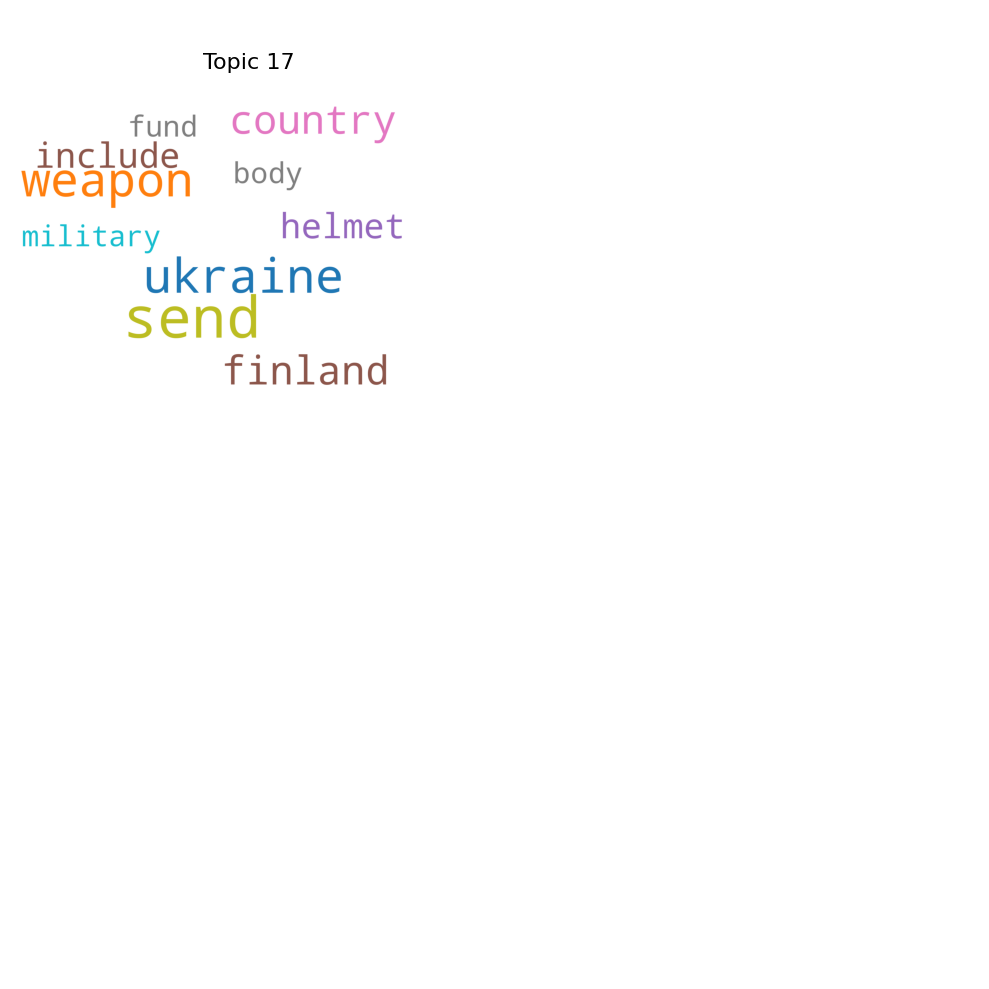

[(59, 0.9970811)]


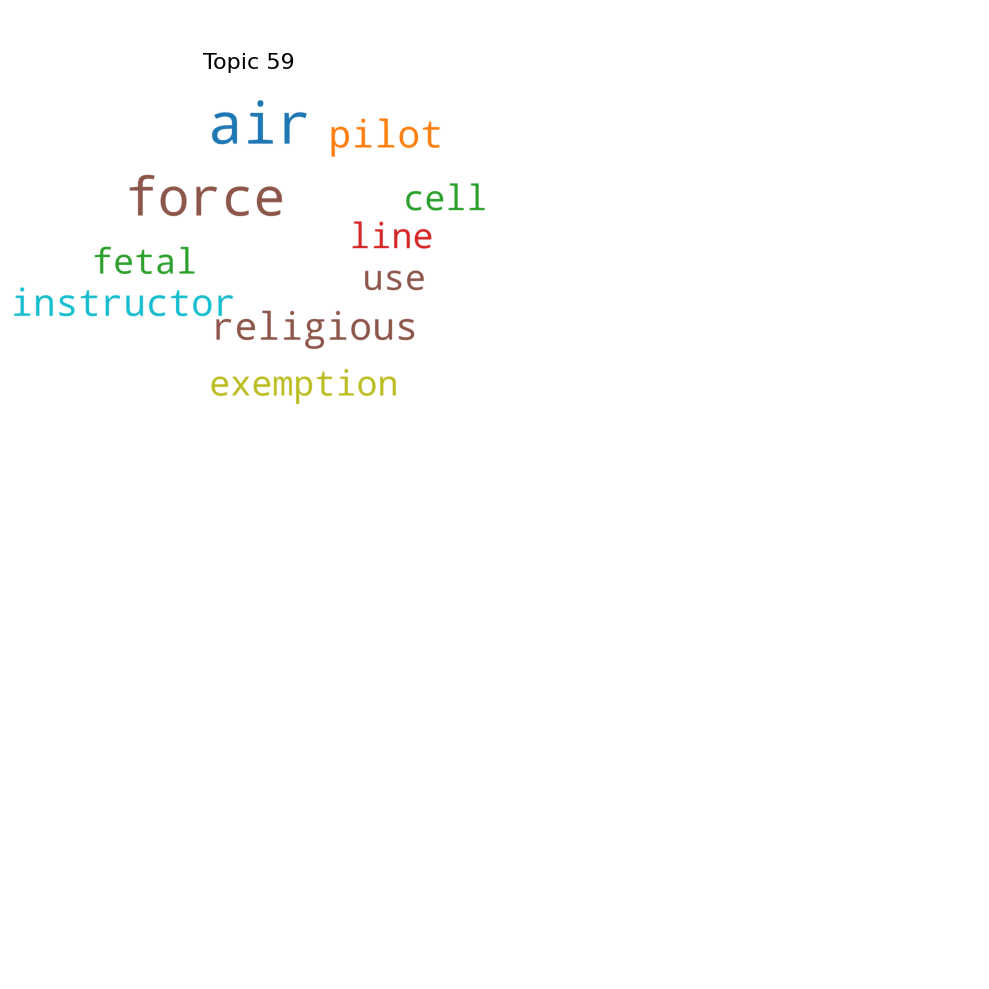

[(16, 0.9982517)]


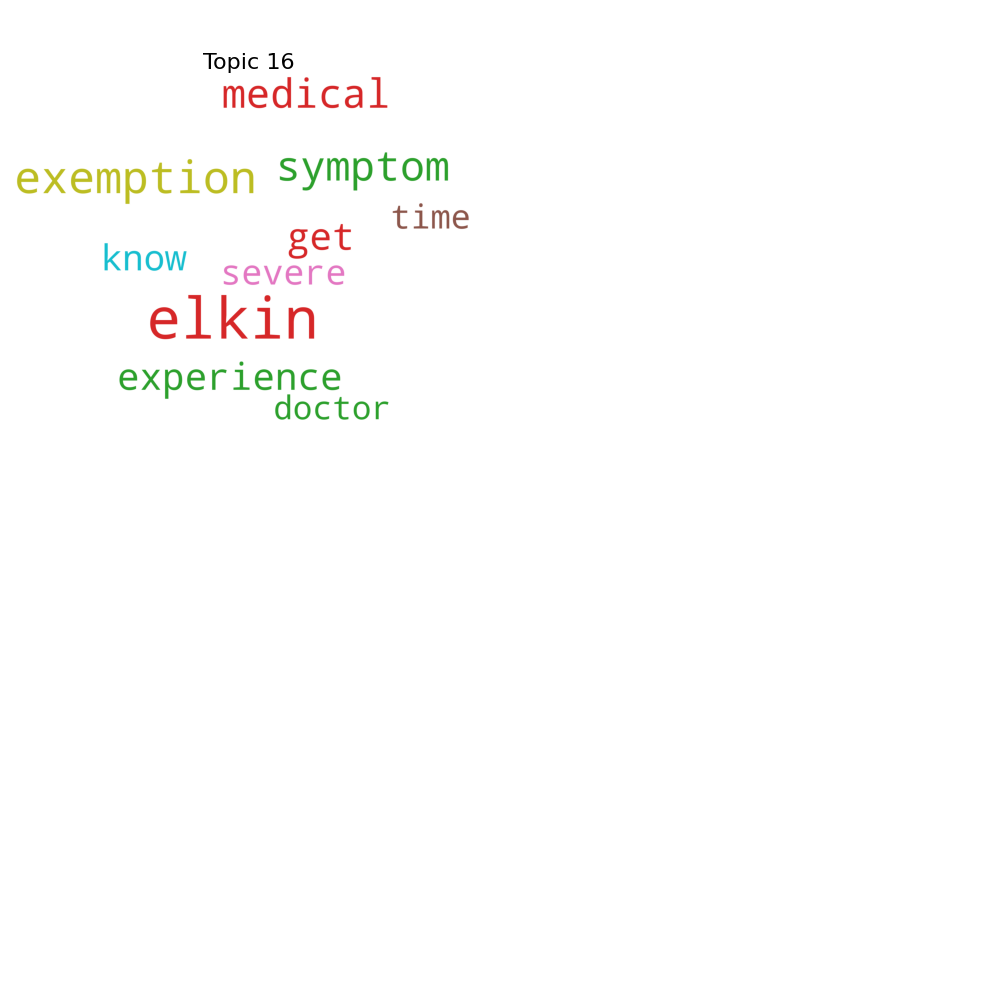

[(88, 0.9939665)]


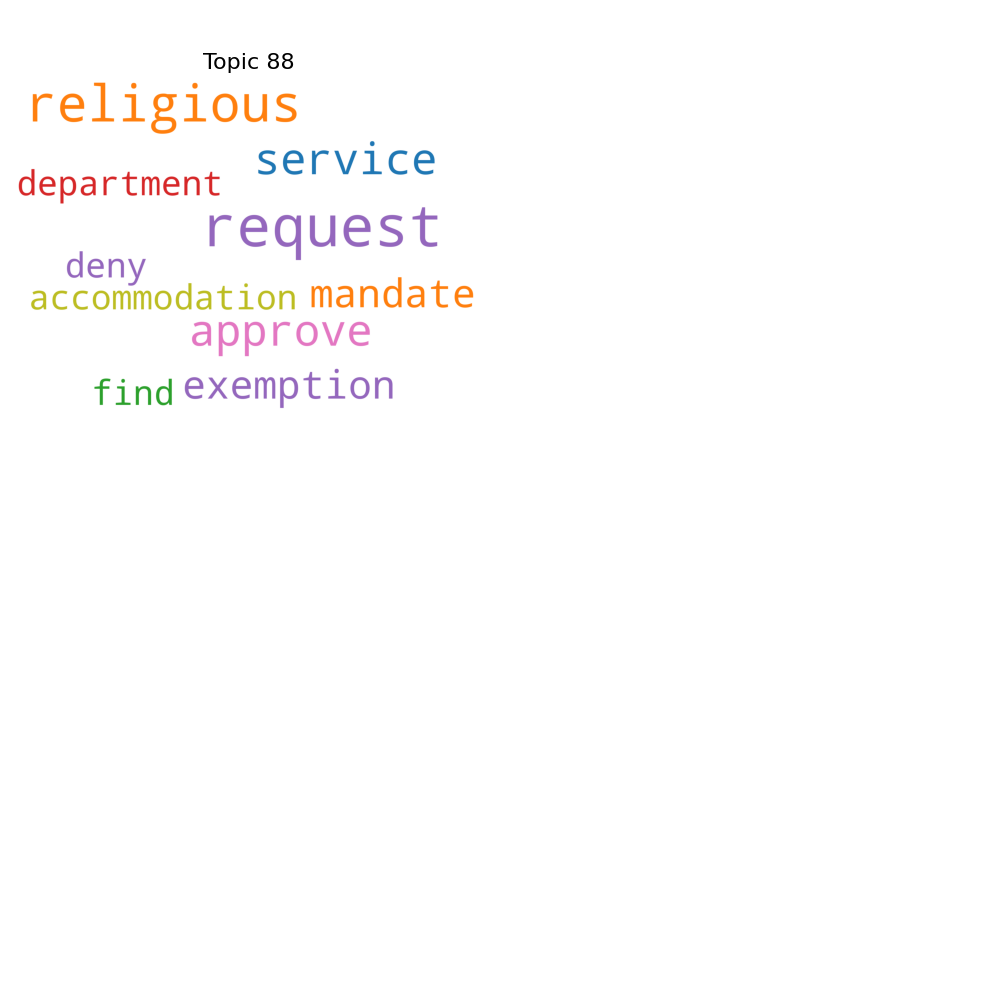

[(61, 0.99100465)]


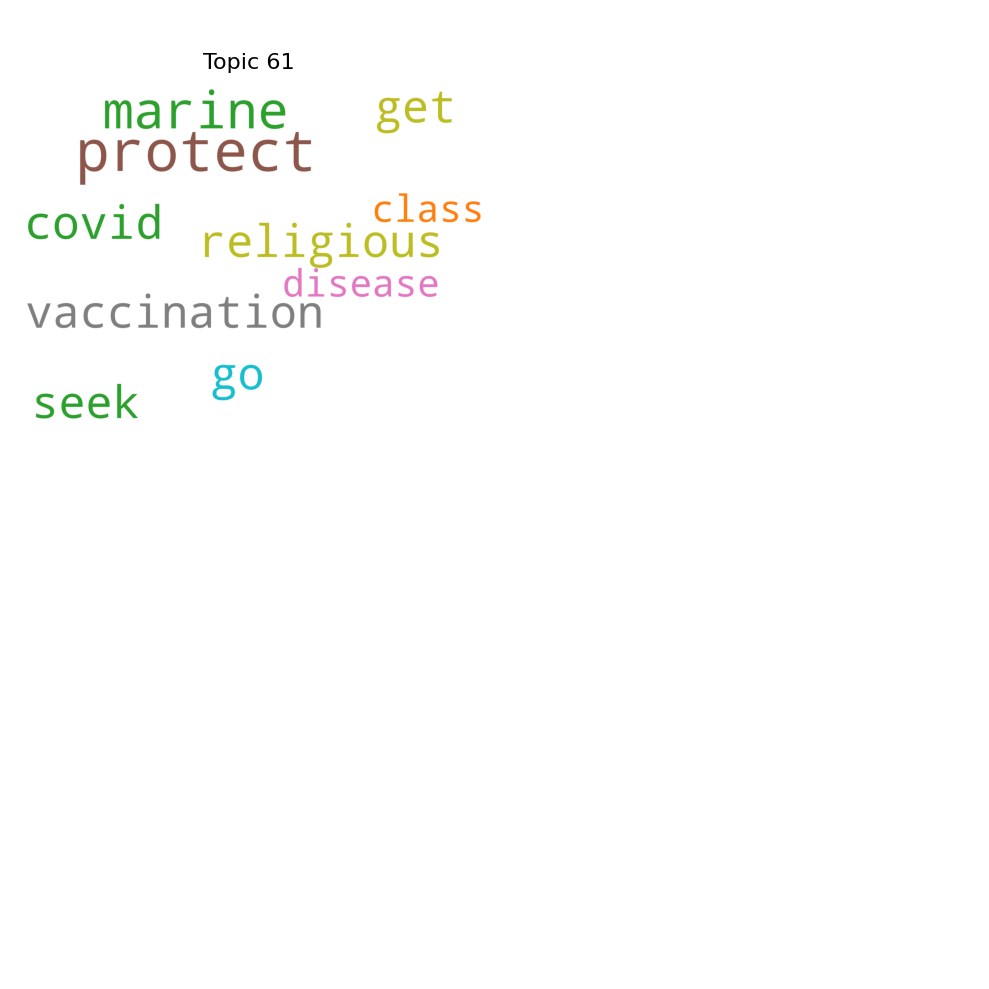

[(56, 0.99312854)]


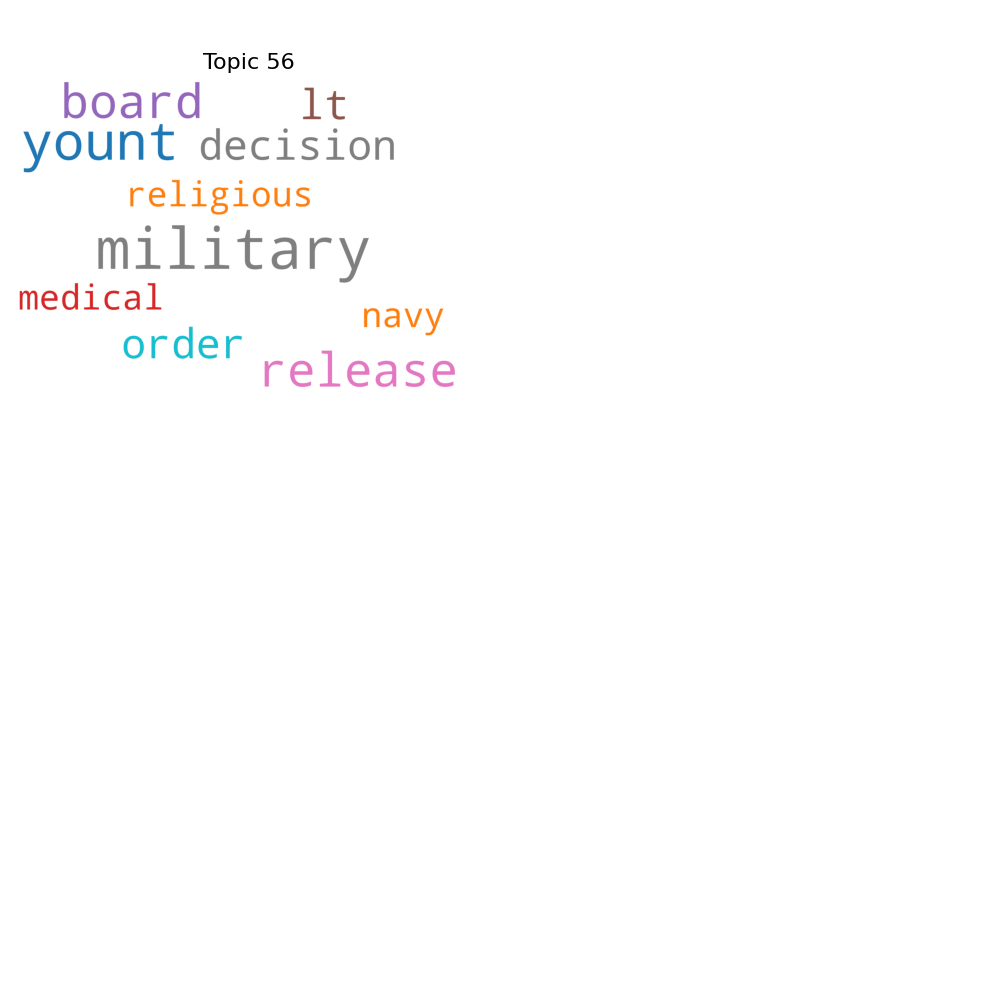

[(31, 0.9968386)]


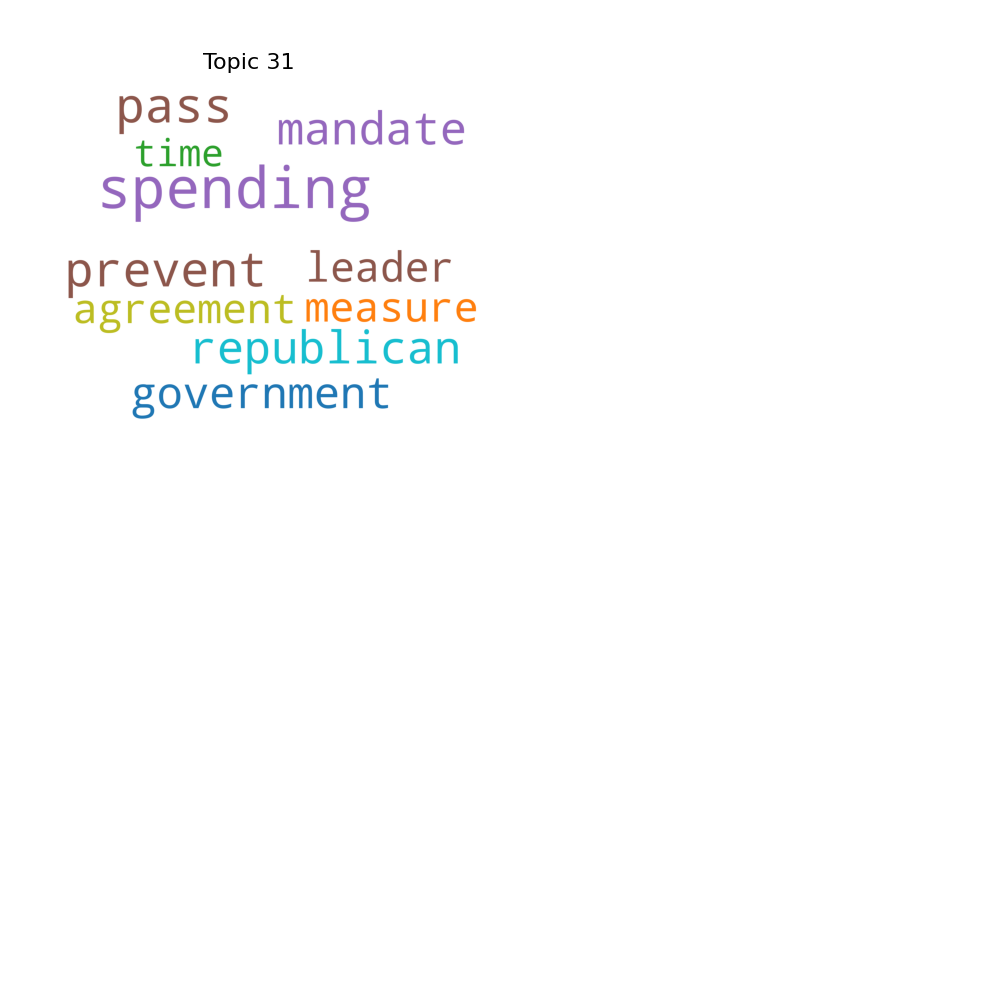

[(48, 0.014730065), (82, 0.9779693)]


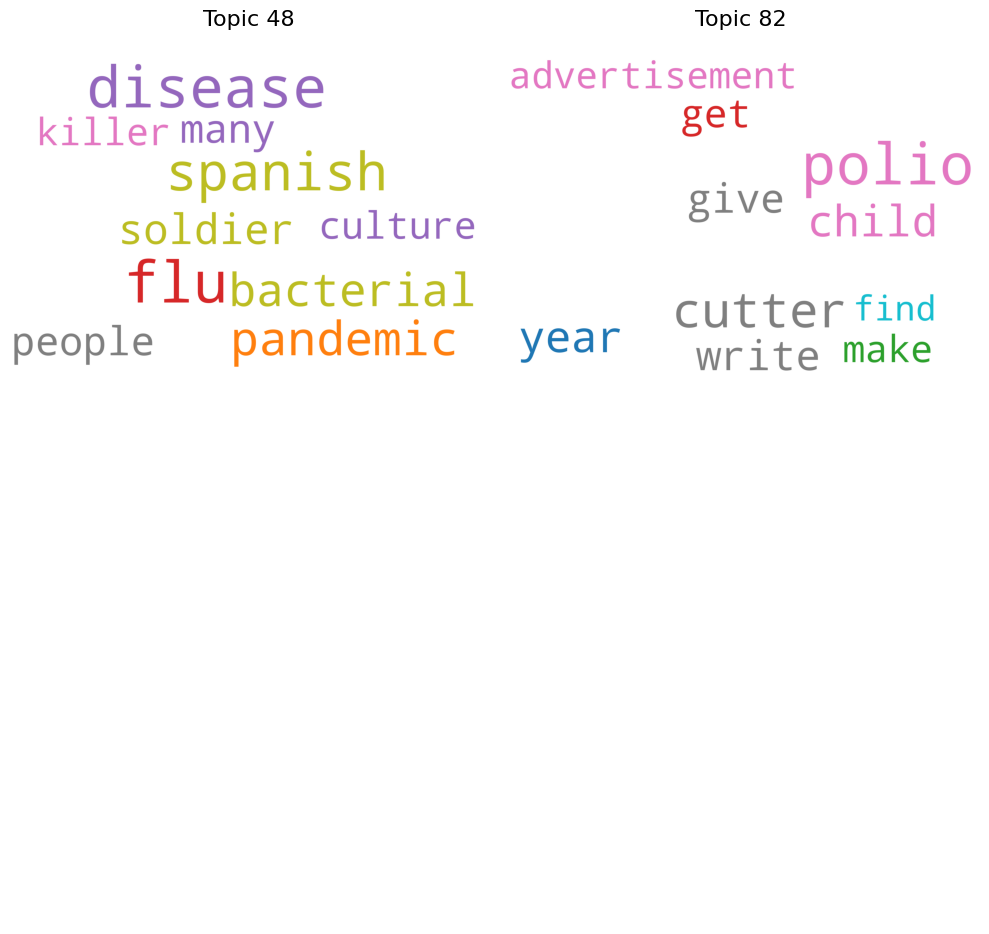

In [20]:

from collections import defaultdict

# Your code for getting topic colors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

# Initialize the WordCloud generator
cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',  # You can choose a different colormap
                  prefer_horizontal=1.0)

def topics_per_article(corpus, ldamodel):
    topics_list = defaultdict(list)
    for doc_id, doc_bow in enumerate(corpus):
        doc_topics = ldamodel.get_document_topics(doc_bow)
        for topic_id, score in doc_topics:
            topics_list[doc_id].append((topic_id, score))
    return topics_list


articleTopics = dict(topics_per_article(corpus, LDA_model))
converted_articleTopics = {}
for key, value in articleTopics.items():
    converted_articleTopics[key] = [(item[0], float(item[1])) for item in value]

write_data("data/topicsPerArticle.json", converted_articleTopics)

topics_list = topics_per_article(corpus, LDA_model)
print(topics_list)
for doc_id, doc_topics in topics_list.items():
    fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0, hspace=0)

    for i, ax in enumerate(axes.flatten()):
        if i < len(doc_topics):
            topic_id, score = doc_topics[i]
            topic_words = dict(LDA_model.show_topic(topic_id, topn=10))  # Get the top words for the topic
            cloud.generate_from_frequencies(topic_words, max_font_size=300)
            ax.imshow(cloud)
            ax.set_title('Topic ' + str(topic_id), fontdict=dict(size=16))
            ax.axis('off')
        else:
            # If there are fewer topics than subplots, hide the extra subplots
            ax.axis('off')
    print(doc_topics)
    plt.tight_layout()
    plt.savefig(f'data/wordclouds/word_cloud_{doc_id}.png')
    plt.show()
